# Illustrated Sequential Proportional Approval Voting

In [238]:
import pandas

# Code and setup.

ballots = pandas.read_json('fixtures/score_ballots.json')
seats = 3
seated = []
max_satisfaction = ballots.values.max()
round_number = 0


def plot_ballot(ballot):
    ballot.plot(kind='barh', color=ballots.loc[0].index,
                title=f"Ballot 1, Round {round_number}", xlim=(0, 5))
    return None


def plot_round_count(round_count):
    round_count.plot(kind='bar', color=round_count.index,
                     xlabel='Candidate', ylabel='Votes', title=f'Round {round_number} Count')
    return None


def reweight(ballot: pandas.DataFrame) -> pandas.DataFrame:
    satisfaction = ballot[ballot.index.isin(seated)].sum()
    weight = 1/(1+satisfaction/max_satisfaction)
    # print(f"This ballot has {votes_for_seated_candidates} votes for a seated candidate.")
    # print(f"Their ballot weight is now {weight}. ")
    # print(f"The original ballot is: \n{ballot}")
    # print(f"The reweighted ballot is: \n{reweighted}")
    return ballot.apply(lambda x: weight*x)


def count(ballots):
    return ballots.sum().drop(seated).sort_values(ascending=False)


def nextRound(ballots):
    global round_number
    round_number = round_number + 1
    ballots = ballots.apply(reweight, axis=1)
    round_count = count(ballots)
    seated.append(round_count.idxmax())
    return ballots, round_count


# Round 1

In round one we only need to count the candidate with the highest votes and then seat that them. In this case it's Blue.

In [239]:
ballots, round_count = nextRound(ballots)

Blue      19.0
Red       18.0
Yellow    14.0
Green     10.0
dtype: float64
Seated: ['Blue']


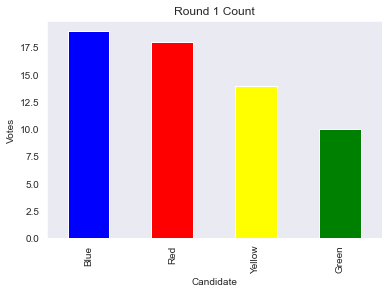

In [240]:
print(round_count)
print(f"Seated: {seated }")
plot_round_count(round_count)


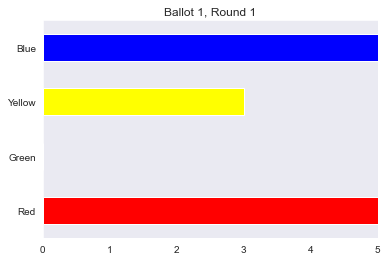

In [241]:
plot_ballot(ballots.loc[0])

# Round 2

In round two we reweight the ballots. Ballot 1 was previously Blue 5, Yellow 3, and Red 5. Now that Blue is seated, this voter's ballot has 5 points of satisfaction. Because of their statisfaction, their votes for other candidates is reduced by $\frac{1}{(1+\frac{Satisfaction}{Max Satisfaction})}$ = $\frac{1}{(1+\frac{5}{5})}$ = $\frac{1}{2}$. Their votes for Yellow are now worth 1.5 and Red 2.5.

In [242]:
ballots, round_count = nextRound(ballots)


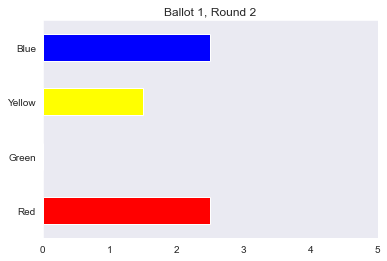

In [243]:
plot_ballot(ballots.loc[0])

Because a lot of votes for Red were correlated with vote for Blue, Red, despite being in 2nd place in Round 1, doesn't have the highest score in Round 2. Yellow has the highest score of 11, and is seated.

Yellow    11.000000
Red       10.236111
Green      7.916667
dtype: float64
Seated: ['Blue', 'Yellow']


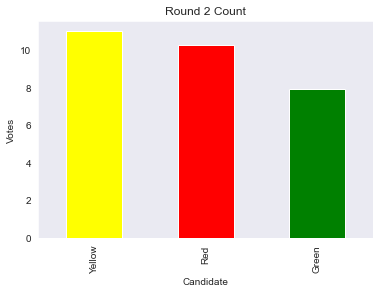

In [244]:
plot_round_count(round_count)
print(round_count)
print(f"Seated: {seated }")

# Round 3

In round 3 Green catches up but isn't able to overcome Red's lead.

Red      6.740537
Green    6.380952
dtype: float64
Seated: ['Blue', 'Yellow', 'Red']


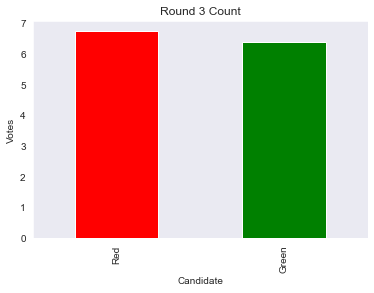

In [245]:
ballots, round_count = nextRound(ballots)
plot_round_count(round_count)
print(round_count)
print(f"Seated: {seated }")

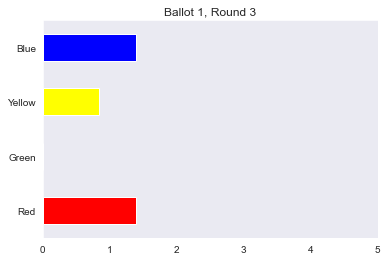

In [246]:
plot_ballot(ballots.loc[0])